c:\Users\willi\miniforge3\envs\tf-env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
139/139 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.6646 - auc: 0.7205 - loss: 0.6918 - precision: 0.6884 - recall: 0.6524 - val_accuracy: 0.5640 - val_auc: 0.7960 - val_loss: 0.6441 - val_precision: 0.5364 - val_recall: 0.9767 - learning_rate: 1.0000e-04
Epoch 2/40
139/139 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - accuracy: 0.7684 - auc: 0.8353 - loss: 0.5199 - precision: 0.7676 - recall: 0.7622 - val_accuracy: 0.5820 - val_auc: 0.7959 - val_loss: 0.6899 - val_precision: 0.5468 - val_recall: 0.9839 - learning_rate: 1.0000e-04
Epoch 3/40
139/139 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - accuracy: 0.7752 - auc: 0.8512 - loss: 0.4877 - precision: 0.7844 - recall: 0.7762 - val_accuracy: 0.7261 - val_auc: 0.8202 - val_loss: 0.5598 - val_precision: 0.6702 - val_recall: 0.8961 - learning_rate: 1.0000e-04
Epoch 4/40
139/139 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - accuracy: 0.8037 - auc: 0.8807 - loss: 0.4360 - precision: 0.8063 - recall: 0.8071 - val_accuracy: 0.7405 - val_auc: 0.8473 - val_l

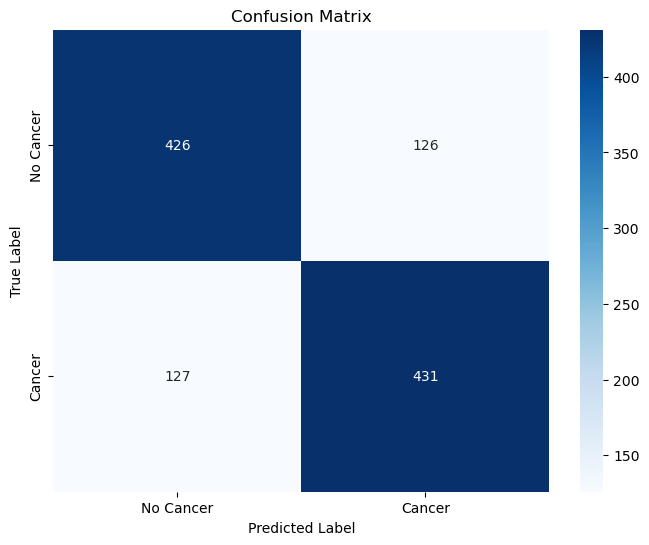

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       552
           1       0.77      0.77      0.77       558

    accuracy                           0.77      1110
   macro avg       0.77      0.77      0.77      1110
weighted avg       0.77      0.77      0.77      1110



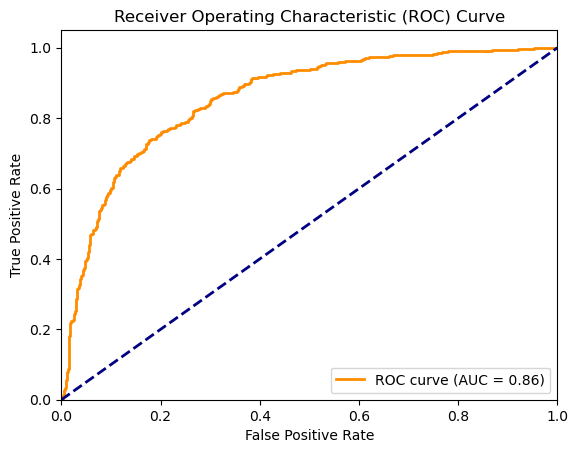

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split

# Load and preprocess data
X = np.load('./X.npy')
Y = np.load('./Y.npy')

X = X.astype('float32') / 255.0
Y = Y.astype('int')

# Split data
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(Y_train), y=Y_train)
class_weight_dict = dict(enumerate(class_weights))

# Model definition
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

# Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Train
history = model.fit(
    X_train, Y_train,
    batch_size=32,
    epochs=40,
    validation_data=(X_val, Y_val),
    class_weight=class_weight_dict,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.5, min_lr=1e-6)]
)

# Evaluate
y_pred = model.predict(X_val)
y_pred_classes = (y_pred > 0.5).astype(int)  # You can adjust this threshold

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(Y_val, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Cancer', 'Cancer'],
            yticklabels=['No Cancer', 'Cancer'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(Y_val, y_pred_classes))

# ROC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_val, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Epoch 1/40


c:\Users\willi\miniforge3\envs\tf-env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 225ms/step - accuracy: 0.6468 - auc_1: 0.6905 - loss: 0.7128 - precision_1: 0.6535 - recall_1: 0.6170 - val_accuracy: 0.5901 - val_auc_1: 0.7629 - val_loss: 0.6682 - val_precision_1: 0.8815 - val_recall_1: 0.2133 - learning_rate: 1.0000e-04
Epoch 2/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 225ms/step - accuracy: 0.7315 - auc_1: 0.7943 - loss: 0.5830 - precision_1: 0.7403 - recall_1: 0.7157 - val_accuracy: 0.7117 - val_auc_1: 0.7839 - val_loss: 0.6544 - val_precision_1: 0.7793 - val_recall_1: 0.5950 - learning_rate: 1.0000e-04
Epoch 3/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 232ms/step - accuracy: 0.7657 - auc_1: 0.8391 - loss: 0.5085 - precision_1: 0.7672 - recall_1: 0.7655 - val_accuracy: 0.5027 - val_auc_1: 0.7940 - val_loss: 0.6765 - val_precision_1: 0.5027 - val_recall_1: 1.0000 - learning_rate: 1.0000e-04
Epoch 4/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 214ms/step - accuracy: 0.7711 - auc_1: 0.8435 - loss: 0.4970 - precision_1: 0.7719 - recall_1: 0.7713 - val_accuracy: 0.502

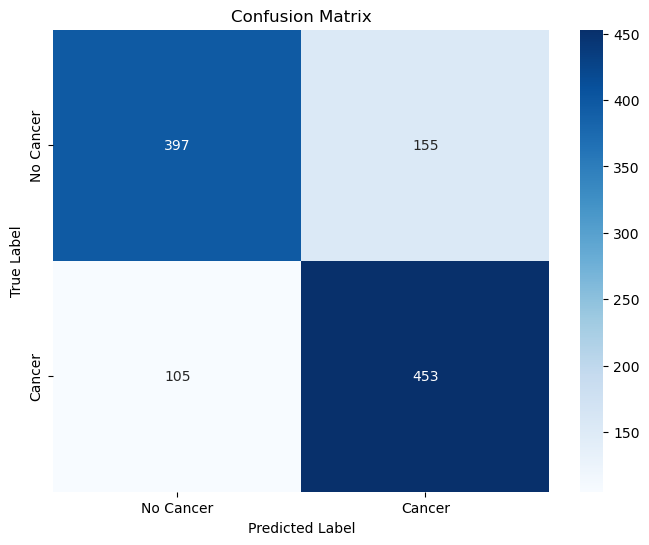

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       552
           1       0.75      0.81      0.78       558

    accuracy                           0.77      1110
   macro avg       0.77      0.77      0.77      1110
weighted avg       0.77      0.77      0.77      1110



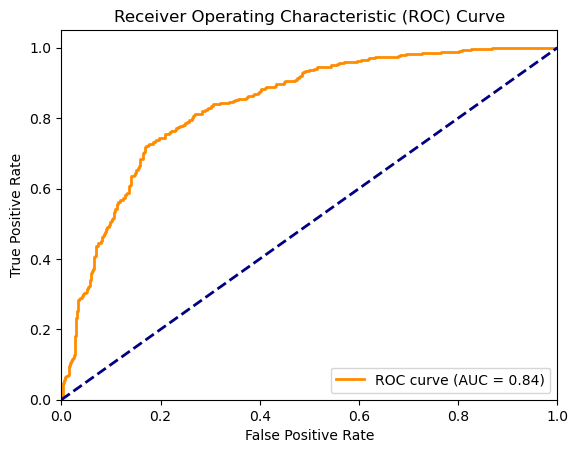

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split

# Load and preprocess data
X = np.load('./X.npy')
Y = np.load('./Y.npy')

X = X.astype('float32') / 255.0
Y = Y.astype('int')

# Split data
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(Y_train), y=Y_train)
class_weight_dict = dict(enumerate(class_weights))

# Model definition
model = models.Sequential([
    layers.Conv2D(32, (5, 5), activation='relu', input_shape=(50, 50, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

# Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Train
history = model.fit(
    X_train, Y_train,
    batch_size=128,
    epochs=40,
    validation_data=(X_val, Y_val),
    class_weight=class_weight_dict,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.5, min_lr=1e-6)]
)

# Evaluate
y_pred = model.predict(X_val)
y_pred_classes = (y_pred > 0.5).astype(int)  # You can adjust this threshold

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(Y_val, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Cancer', 'Cancer'],
            yticklabels=['No Cancer', 'Cancer'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(Y_val, y_pred_classes))

# ROC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_val, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()